### 📊 Data Source and Model Performance

The data used in this notebook comes from the Alzheimer's Disease dataset available on **[Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset)**.

### 📈 Model Performance

The model created in this notebook provides a slight improvement in accuracy compared to the results reported by the authors of **[this paper](https://www.ijisrt.com/assets/upload/files/IJISRT24JUN1915.pdf)**. The authors reported an accuracy of 94.07%, whereas our model achieved an accuracy of 95.58%.


# 🧠 Alzheimer's Disease Data Analysis 🧬

In this notebook, we will analyze the **Alzheimer's Disease** dataset (`alzheimers_disease_data.csv`). We will explore the data, visualize it, and build machine learning models to gain insights into the factors associated with Alzheimer's disease. Let's dive in! 📊🔍

---

## 📦 Importing Libraries and Setting Up Visualization Styles 🎨

In this section, we import the necessary libraries for our analysis and set up the visualization styles. 

### Libraries:
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **Matplotlib & Seaborn**: For data visualization.
- **TensorFlow & Keras**: For building and training neural network models.
- **Scikit-Learn**: For machine learning models, including ensemble methods, support vector machines, and model evaluation.

### Visualization Setup:
- **Seaborn**: Setting the style to 'whitegrid' for clean and professional-looking plots.
- **Matplotlib**: Configuring the default figure size for plots.

Let's get started by importing these libraries and setting up our environment!🚀


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Setting up the visualisation styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]


## 📥 Loading and Displaying the Dataset 🧠

In this section, we load the **Alzheimer's Disease** dataset from a CSV file and display the first few rows to get an initial understanding of the data.

### Steps:
1. **Load the Dataset**: We use `pandas` to read the dataset from the CSV file `alzheimers_disease_data.csv`.
2. **Display the Data**: We display the first few rows of the dataset to examine its structure and contents.

Let's begin by loading the dataset and taking a quick look at the data! 📊


In [2]:
# Load the dataset
df = pd.read_csv('alzheimers_disease_data.csv')

# Display the first few rows of the dataset
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## 🗑️ Cleaning the Dataset: Dropping Unnecessary Columns 🧹

In this section, we clean the dataset by dropping columns that are not needed for our analysis.

### Columns to Drop:
- **`PatientID`**: This column contains unique identifiers for each patient, which are not necessary for our analysis.
- **`DoctorInCharge`**: This column contains a confidential string `XXXConfid` for all rows, making it irrelevant for our analysis.

By removing these columns, we can focus on the relevant data for our study.

Let's proceed with cleaning the dataset! 🧽


In [3]:
# Drop the 'DoctorInCharge' and 'PatientID' column
df.drop(columns=['DoctorInCharge'], inplace=True)
df.drop(columns=['PatientID'], inplace=True)

## 🔍 Exploratory Data Analysis (EDA) 📊

In this section, we perform an exploratory data analysis to understand the dataset better.

### Steps:

1. **Column Names**: Display the names of all columns in the dataset.
2. **Dataset Information**: Get basic information about the dataset, such as the number of entries, data types, and memory usage.
3. **Summary Statistics**: Display summary statistics for numerical columns to understand the distribution and central tendencies.
4. **Missing Values**: Check for missing values in the dataset and visualize them.
5. **Histograms**: Plot histograms for numerical columns to visualize their distributions.
6. **Correlation Matrix**: Compute and visualize the correlation matrix to identify relationships between numerical variables.

Let's dive into the data and uncover some insights! 🔍📈


In [4]:
# Display column names
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [5]:
# Get information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [6]:
# Get summary statistics
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

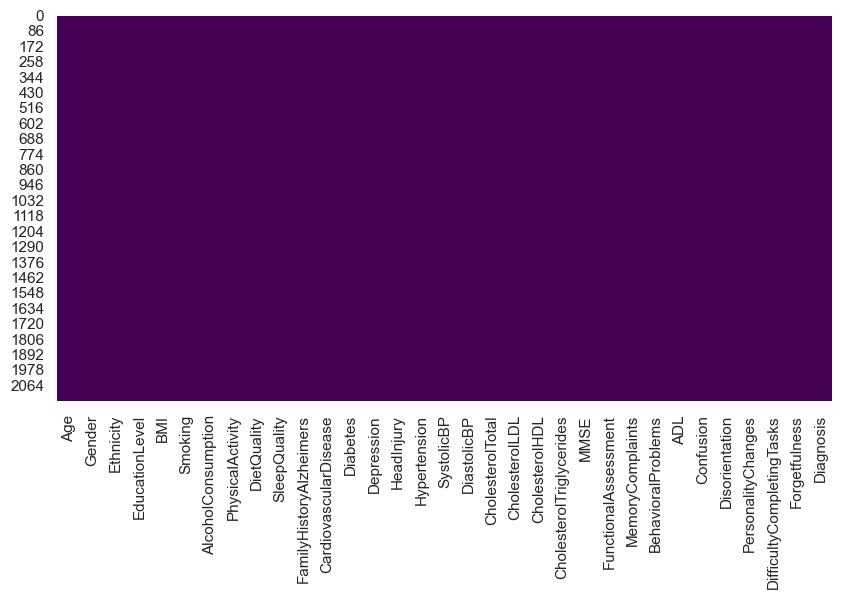

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()



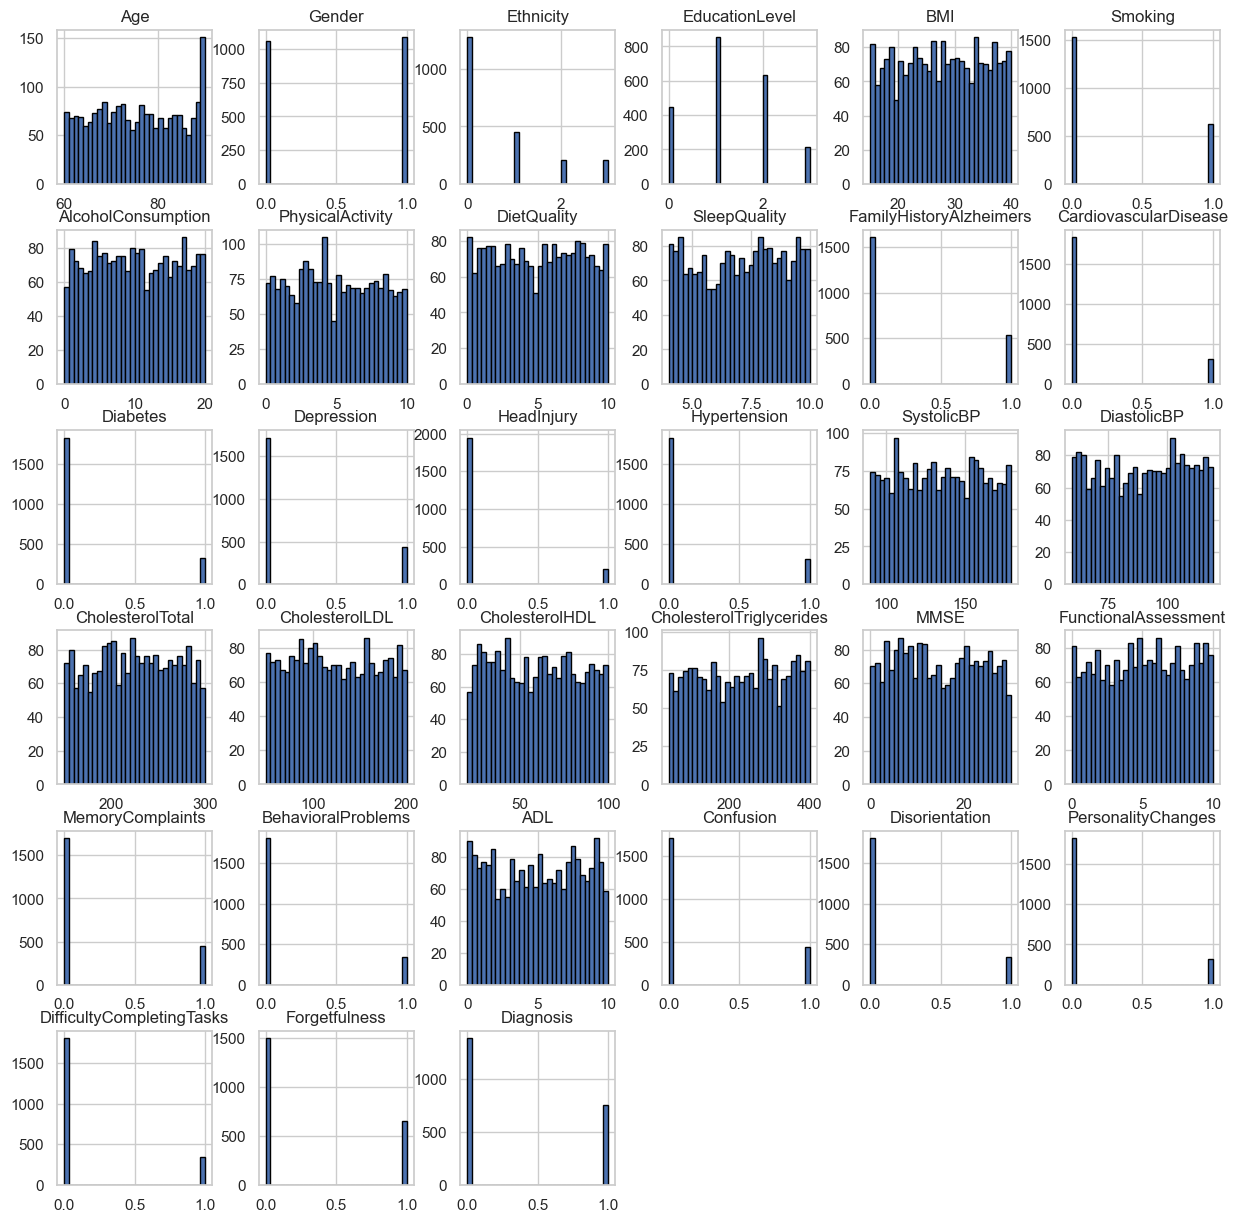

In [8]:
# Plotting histograms for numerical columns
df.hist(bins=30, figsize=(15, 15), edgecolor='black')
plt.show()


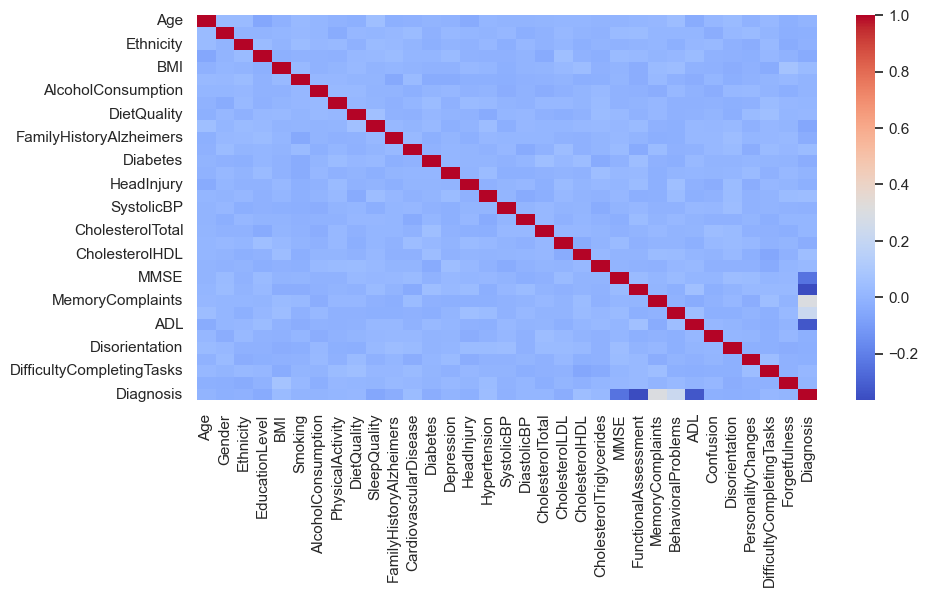

In [9]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,   cmap='coolwarm')
plt.show()


## 🛠️ Feature Engineering: Creating New Features 🔧

In this section, we create a new feature from existing ones to enhance our analysis and improve the performance of our machine learning models.

### Example:
- **Creating a New Feature**: We create a new feature called `BMI_SystolicBP_Ratio` by taking the ratio of `BMI` to `SystolicBP`.

### Why Create This Feature?
Creating the `BMI_SystolicBP_Ratio` can be beneficial for several reasons:
1. **Interrelationship Insight**: This ratio can reveal insights into the relationship between body mass index (BMI) and systolic blood pressure (SystolicBP). For instance, a higher ratio might indicate a disproportionate BMI relative to blood pressure, which could be significant in the context of Alzheimer's disease.
2. **Feature Variability**: Adding new features that combine existing ones in meaningful ways can increase the variability in the dataset, potentially improving the performance of machine learning models by providing them with more nuanced information.
3. **Health Indicators**: Both BMI and SystolicBP are important health indicators. Combining them into a single feature might help in understanding complex interactions affecting patients' health and disease progression.

After creating the new feature, we display the first few rows to verify the new feature.

Let's enhance our dataset with new features! 🚀

In [10]:
# Example: Creating a new feature based on existing ones
df['BMI_SystolicBP_Ratio'] = df['BMI'] / df['SystolicBP']

# Display the first few rows to check the new feature
print(df[['BMI', 'SystolicBP', 'BMI_SystolicBP_Ratio']].head())


         BMI  SystolicBP  BMI_SystolicBP_Ratio
0  22.927749         142              0.161463
1  26.827681         115              0.233284
2  17.795882          99              0.179756
3  33.800817         118              0.286448
4  20.716974          94              0.220393


## 🎯 Defining Features and Target Variable 🔍

In this section, we define the features and the target variable for our machine learning models.

### Steps:
1. **Features (`X`)**: We select all columns except for the target variable column (`Diagnosis`). These features will be used to predict the target variable.
2. **Target Variable (`y`)**: We specify the target variable, which is the column we aim to predict (`Diagnosis`).

Let's prepare our data for modeling! 📊🤖


In [11]:
# Define features and target variable
# Note: Adjust based on your actual target variable in the dataset
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target variable
 

In [12]:
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,BMI_SystolicBP_Ratio
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0.161463
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0.233284
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0.179756
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0.286448
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0.220393


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int64

## ✂️ Splitting Data into Training and Testing Sets 📚

In this section, we split our dataset into training and testing sets to evaluate the performance of our machine learning models.

### Steps:
1. **Split the Data**: We use `train_test_split` to divide the features (`X`) and the target variable (`y`) into training and testing sets. We set aside 20% of the data for testing and use a random state for reproducibility.
2. **Display Shapes**: We print the shapes of the training and testing sets to verify the split.

By splitting the data, we can train our models on one portion of the data and test them on another to gauge their performance. 

Let's split our data and prepare for modeling! ✂️🔍


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1719, 33) (430, 33) (1719,) (430,)


## ⚖️ Scaling Features: Standardization with StandardScaler 🔧

In this section, we standardize our features using `StandardScaler` to ensure that our machine learning models perform optimally.

### Steps:
1. **Initialize the Scaler**: We create an instance of `StandardScaler`.
2. **Fit and Transform**: We fit the scaler on the training data and then transform both the training and testing data.

### Why Scale the Features?
1. **Improved Model Performance**: Many machine learning algorithms, such as support vector machines (SVM) and gradient boosting, perform better when features are on a similar scale. Scaling can improve the convergence speed and the accuracy of these models.
2. **Normalization**: Standardizing the data means that each feature will have a mean of 0 and a standard deviation of 1. This normalization helps models that rely on distance metrics (e.g., k-nearest neighbors) to perform more accurately.
3. **Preventing Bias**: Unscaled data can cause features with larger ranges to dominate the learning process, leading to biased models. Scaling ensures that all features contribute equally.

By scaling our features, we ensure that our models have the best chance of learning effectively from the data.

Let's scale our features and prepare them for training! ⚖️📈


In [15]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [16]:
# Display the first few rows of the scaled features
print(X_train_scaled[:5])

[[ 1.32852308  0.99941844  1.30905803 -0.31336327  0.01065932  1.57696399
   1.13666856 -1.64897284  0.32795912  0.45404862 -0.57667854 -0.39891965
  -0.42881732 -0.51197123 -0.33236293 -0.42405371  1.18738838  0.82003274
  -1.69123942 -0.98513025 -0.97510938 -0.71046627  1.23439164 -0.68665172
  -0.509255   -0.43071712  0.56772702 -0.50199892 -0.4345074  -0.41734917
  -0.43922839 -0.64948921 -0.6475559 ]
 [-0.54736743 -1.0005819  -0.70190779  1.89883988  1.30582655 -0.63412989
  -1.49210597  1.5215992  -1.0872222  -1.03546622  1.73406834 -0.39891965
  -0.42881732 -0.51197123 -0.33236293 -0.42405371  0.37588643  0.2006599
  -1.21969766  1.3171018   0.03844378  0.53494262 -0.74632357  0.18934908
  -0.509255    2.32170941 -0.36860359 -0.50199892 -0.4345074  -0.41734917
  -0.43922839  1.53967147  0.60378264]
 [ 0.77679057  0.99941844  2.31454094  0.7927383  -1.63435929 -0.63412989
   1.09959265 -1.07068297  0.56377158 -0.50742496 -0.57667854  2.50677049
   2.33199534 -0.51197123 -0.332362

In [17]:
X_train_scaled.shape 

(1719, 33)

## 🧠 Building and Training a Neural Network Model with Dropout Layers 🏋️‍♂️

In this section, we define, compile, and train a neural network model using TensorFlow and Keras. We incorporate dropout layers to prevent overfitting and improve the model's generalization ability.

### Steps:
1. **Define the Model**: We create a sequential neural network model with several dense (fully connected) layers and dropout layers.
   - **Input Layer**: Accepts the number of features as input.
   - **Dense Layers**: Multiple layers with 500 and 750 units, using ReLU activation functions.
   - **Dropout Layers**: Dropout layers with different rates (0.75, 0.7, 0.5) are added after each dense layer to prevent overfitting.
   - **Output Layer**: A single unit with a sigmoid activation function for binary classification.
2. **Compile the Model**: We compile the model using the Adam optimizer and binary cross-entropy loss, with accuracy as the evaluation metric.
3. **Train the Model**: We train the model on the scaled training data for 50 epochs, using 20% of the training data as validation.

### Why Use Dropout Layers?
- **Prevent Overfitting**: Dropout layers randomly set a fraction of input units to zero during training, preventing the model from becoming too dependent on any one feature. This helps the model generalize better to unseen data.
- **Regularization**: By forcing the model to learn more robust features that are useful in conjunction with many different random subsets of the other neurons, dropout acts as a form of regularization.



### Compiling the Model: Optimizer and Loss Function ⚙️

In this part, we prepare our neural network model to learn from the data by setting up how it should adjust and evaluate its predictions.

#### Optimizer: Adam
- **What it is**: Adam is like a smart guide that helps the model learn faster and more accurately. It adjusts how much the model changes with each step, based on what it has learned so far.
- **Why it's useful**: Imagine you’re learning to ride a bike. Adam helps you learn by making sure you don’t pedal too fast or too slow, finding the right speed for you to balance and move forward smoothly. This helps the model learn efficiently and effectively.

#### Loss Function: Binary Cross-Entropy
- **What it is**: Binary cross-entropy is a way to measure how well the model’s predictions match the actual answers. It’s like a score that tells us how close the model’s guesses are to being correct.
- **Why it's useful**: Binary cross-entropy penalizes incorrect predictions more heavily the further they are from the actual class. This property makes it an ideal choice for binary classification tasks, helping the model learn to output probabilities that are close to the true class labels.


By setting up the model with Adam and binary cross-entropy, we make sure it has the right tools to learn and improve its predictions.

Let's get our model ready to learn and start training! 🚀 training! 🚀


Let's build, compile, and train our neural network model! 🧠💪


In [18]:
 
# Define a new model with dropout layers to prevent overfitting
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(500, activation='relu'),
    Dropout(0.75),
    Dense(500, activation='relu'),
    Dropout(0.7),
     Dense(750, activation='relu'),
    Dropout(0.5),
     Dense(500, activation='relu'),
    Dropout(0.75),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=2)


Epoch 1/50
43/43 - 1s - 28ms/step - accuracy: 0.5942 - loss: 0.7672 - val_accuracy: 0.6483 - val_loss: 0.6586
Epoch 2/50
43/43 - 0s - 4ms/step - accuracy: 0.6145 - loss: 0.6850 - val_accuracy: 0.6483 - val_loss: 0.6011
Epoch 3/50
43/43 - 0s - 4ms/step - accuracy: 0.6742 - loss: 0.6151 - val_accuracy: 0.7762 - val_loss: 0.5552
Epoch 4/50
43/43 - 0s - 3ms/step - accuracy: 0.7404 - loss: 0.5293 - val_accuracy: 0.7994 - val_loss: 0.4639
Epoch 5/50
43/43 - 0s - 4ms/step - accuracy: 0.7484 - loss: 0.5154 - val_accuracy: 0.8052 - val_loss: 0.4573
Epoch 6/50
43/43 - 0s - 4ms/step - accuracy: 0.7905 - loss: 0.4593 - val_accuracy: 0.8081 - val_loss: 0.4387
Epoch 7/50
43/43 - 0s - 4ms/step - accuracy: 0.7985 - loss: 0.4305 - val_accuracy: 0.8081 - val_loss: 0.4357
Epoch 8/50
43/43 - 0s - 4ms/step - accuracy: 0.8116 - loss: 0.4275 - val_accuracy: 0.8169 - val_loss: 0.4260
Epoch 9/50
43/43 - 0s - 3ms/step - accuracy: 0.8247 - loss: 0.4248 - val_accuracy: 0.8343 - val_loss: 0.4296
Epoch 10/50
43/43 

## 📝 Evaluating the Model and Making Predictions 📊

In this section, we evaluate our trained neural network model on the test set and make predictions. We then analyze the model's performance using various metrics.

### Steps:
1. **Evaluate the Model**: We use the test set to evaluate the model's performance, measuring loss and accuracy.
2. **Make Predictions**: We use the model to predict the outcomes on the test set. Since our output is a probability, we convert it to a binary class (0 or 1) by checking if it's greater than 0.5.
3. **Evaluate Predictions**: We assess the model's predictions using several metrics:
   - **Accuracy**: The proportion of correctly predicted outcomes.
   - **Confusion Matrix**: A table that shows the true positives, true negatives, false positives, and false negatives. This helps us understand the types of errors the model makes.
   - **Classification Report**: A detailed report showing precision, recall, and F1-score for each class.

By evaluating the model, we can understand how well it performs on unseen data and identify areas for improvement.

Let's evaluate our model and see how well it predicts! 📈🔍


In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f'Test Accuracy: {test_accuracy}')

# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the predictions 
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


14/14 - 0s - 2ms/step - accuracy: 0.8279 - loss: 0.4823
Test Accuracy: 0.8279069662094116
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.827906976744186
Confusion Matrix:
[[245  32]
 [ 42 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       277
           1       0.78      0.73      0.75       153

    accuracy                           0.83       430
   macro avg       0.81      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



## 📈 Understanding the Classification Report Results 📊

The classification report provides a detailed look at the performance of our model. Let's break down each part:

### Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.73      0.75       153

    accuracy                           0.83       430
   macro avg       0.81      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430

### Metrics Explained:
1. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. High precision means that the model has a low false positive rate.
   - **Class 0**: 0.85 (85% of the predicted Class 0 instances are correct)
   - **Class 1**: 0.78 (78% of the predicted Class 1 instances are correct)

2. **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class. High recall means that the model has a low false negative rate.
   - **Class 0**: 0.89 (89% of the actual Class 0 instances are correctly predicted)
   - **Class 1**: 0.73 (71% of the actual Class 1 instances are correctly predicted)

3. **F1-Score**: The weighted average of precision and recall. This score is more useful than accuracy when you have an uneven class distribution.
   - **Class 0**: 0.87
   - **Class 1**: 0.75

4. **Support**: The number of actual occurrences of the class in the dataset.
   - **Class 0**: 277 instances
   - **Class 1**: 153 instances

### Overall Metrics:
- **Accuracy**: The ratio of correctly predicted instances to the total instances. In this case, the accuracy is 0.83 (83%), meaning the model correctly predicted 83% of the instances.
- **Macro Average**: The average of precision, recall, and f1-score, calculated for each class and then averaged.
  - Precision: 0.81
  - Recall: 0.80
  - F1-Score: 0.81

- **Weighted Average**: The average of precision, recall, and f1-score, weighted by the number of instances in each class.
  - Precision: 0.83
  - Recall: 0.83
  - F1-Score: 0.83

### Interpretation:
- The model performs better at predicting Class 0 (non-disease) with higher precision, recall, and f1-score compared to Class 1 (disease).
- The overall accuracy of the model is 83%, which is fairly good.
- The weighted averages show that the model maintains a balance between precision and recall across both classes.

By analyzing these metrics, we can conclude that the model is fairly accurate, with better performance in predicting non-disease instances compared to disease instances. There is room for improvement, especially in increasing recall for Class 1 (disease) to reduce false negatives.


## 🌲 Training the Random Forest Model 🌳

In this section, we initialize, train, and make predictions using a Random Forest model.

1. **Initialize the Model**: Create a Random Forest classifier with 100 trees (`n_estimators=100`) and set a random state for reproducibility.
2. **Train the Model**: Fit the Random Forest model on the scaled training data.
3. **Make Predictions**: Use the trained model to predict the outcomes on the test set.

In [20]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)


## 📊 Evaluating the Random Forest Model 🌟

In this section, we evaluate the performance of the trained Random Forest model using several metrics:

1. **Accuracy**: Calculate the accuracy of the model on the test set.
2. **Confusion Matrix**: Generate the confusion matrix to understand the types of errors made by the model.
3. **Classification Report**: Obtain a detailed classification report showing precision, recall, and F1-score for each class.
4. **Print Results**: Display the accuracy, confusion matrix, and classification report.
 

In [21]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)


Accuracy: 0.9209302325581395
Confusion Matrix:
[[272   5]
 [ 29 124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.96      0.81      0.88       153

    accuracy                           0.92       430
   macro avg       0.93      0.90      0.91       430
weighted avg       0.92      0.92      0.92       430



### Interpretation:
- The model performs very well at predicting Class 0 (non-disease) with high precision, recall, and f1-score.
- The model also performs well at predicting Class 1 (disease), though with slightly lower recall, indicating it missed some positive cases.
- The overall accuracy of the model is 92%, which is excellent.
- The macro and weighted averages show that the model maintains a good balance between precision and recall across both classes.

By analyzing these metrics, we can conclude that the Random Forest model is highly accurate and performs well in distinguishing between the classes, with a slight room for improvement in recalling Class 1 instances.

## 🔄 Performing Cross-Validation 📊

In this section, we perform cross-validation on our Random Forest model to ensure its robustness and reliability.

### What is Cross-Validation?
Cross-validation is a technique used to assess the performance of a machine learning model. It involves dividing the dataset into multiple subsets (folds) and training the model on some folds while testing it on the remaining fold. This process is repeated several times, and the results are averaged to provide a more accurate estimate of the model's performance.

### Why is it Useful?
1. **Reduces Overfitting**: By training and testing the model on different subsets of the data, cross-validation helps prevent overfitting, ensuring the model generalizes well to unseen data.
2. **Provides Reliable Performance Metrics**: It offers a more comprehensive evaluation of the model's performance by averaging the results across multiple folds, making it more reliable than a single train-test split.
 


In [22]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy Scores: [0.89825581 0.9505814  0.94186047 0.9127907  0.90670554]
Mean Cross-Validation Accuracy: 0.9220387822903249



### Interpretation:
1. **Individual Fold Scores**: 
   - **Fold 1**: 0.8982 (89.83%)
   - **Fold 2**: 0.95058 (95.06%)
   - **Fold 3**: 0.9418 (94.18%)
   - **Fold 4**: 0.9127 (91.28%)
   - **Fold 5**: 0.9067 (90.67%)

   The scores for each fold indicate that the model consistently performs well, with all accuracies above 89%.

2. **Mean Cross-Validation Accuracy**:
   - The average accuracy across all folds is approximately 92.20%.
   - This high mean accuracy suggests that the model is robust and performs reliably across different subsets of the training data.

### Significance:
- **Consistency**: The relatively small variation in scores (ranging from approximately 89.83% to 95.06%) indicates that the model's performance is stable and consistent across different folds of the data.
- **High Accuracy**: The mean accuracy of 92.20% reinforces the model's overall strong performance, providing confidence that it generalizes well to unseen data.

By analyzing these cross-validation results, we can conclude that our Random Forest model is both reliable and effective in predicting the target variable. 📈🌟


## 🌟 Analyzing Feature Importances 🌟

In this section, we determine which features are the most important for our Random Forest model's predictions. Understanding feature importances can help us gain insights into the factors that influence the model's decisions the most.

### Steps:
1. **Get Feature Importances**: Extract the importance scores for each feature from the trained Random Forest model.
2. **Create a DataFrame**: Organize the feature names and their corresponding importance scores into a DataFrame for easy visualization.
3. **Sort Features**: Sort the features by their importance scores in descending order.
4. **Plot Feature Importances**: Visualize the feature importances using a bar plot to easily identify the most influential features.


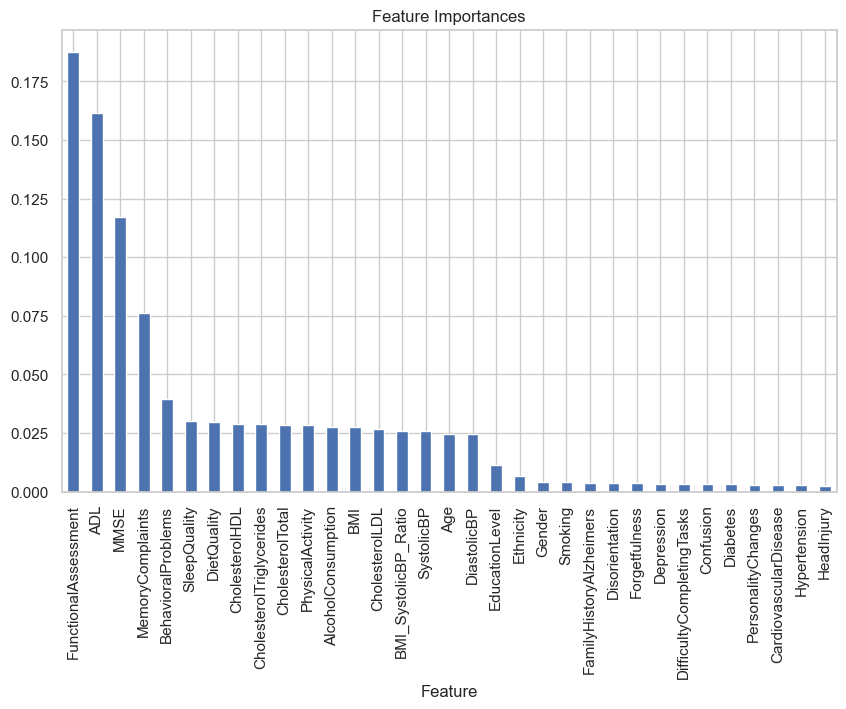

In [23]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
importances_df.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


## 🏆 Selecting Top Features for Dimensionality Reduction 🌟

In this section, we focus on identifying the top features based on their importance scores to reduce the dimensionality of our dataset.

1. **Select Top 18 Features**: Extract the top 18 most important features from the sorted DataFrame of feature importances.
2. **Extract Feature Names**: Get the names of these top 18 features and store them in an array.
3. **Print Feature Names**: Display the array of the top 18 feature names.

### Why It's Useful:
- **Dimensionality Reduction**: Reducing the number of features helps simplify the model, making it less complex and potentially improving performance.
- **Insight into Model Behavior**: By selecting and examining the top features, we gain insights into the most influential factors in our model's predictions.
- **Improved Efficiency**: Working with fewer features can speed up training and evaluation times.

By selecting the most important features, we can effectively reduce the dimensionality of our dataset while retaining the most critical information.


In [24]:

# Select the top 18 features
top_18_features = importances_df.head(18)

# Extract the top 18 feature names into an array
top_18_feature_names = top_18_features['Feature'].values

# Print the array of top 18 feature names
print(top_18_feature_names)



['FunctionalAssessment' 'ADL' 'MMSE' 'MemoryComplaints'
 'BehavioralProblems' 'SleepQuality' 'DietQuality' 'CholesterolHDL'
 'CholesterolTriglycerides' 'CholesterolTotal' 'PhysicalActivity'
 'AlcoholConsumption' 'BMI' 'CholesterolLDL' 'BMI_SystolicBP_Ratio'
 'SystolicBP' 'Age' 'DiastolicBP']


In [25]:
# Top 18 features as identified earlier
top_18_feature_names = ['FunctionalAssessment', 'ADL', 'MMSE', 'MemoryComplaints',
                        'BehavioralProblems', 'SleepQuality', 'DietQuality', 'CholesterolHDL',
                        'CholesterolTriglycerides', 'CholesterolTotal', 'PhysicalActivity',
                        'AlcoholConsumption', 'BMI', 'CholesterolLDL', 'BMI_SystolicBP_Ratio',
                        'SystolicBP', 'Age', 'DiastolicBP']

# Add the target variable to the list of features
features_with_target = top_18_feature_names + ['Diagnosis']

# Subset the original DataFrame to include only the top 18 features and the target variable
df_reduced = df[features_with_target]
 

In [26]:
df_reduced.head()

,FunctionalAssessment,ADL,MMSE,MemoryComplaints,BehavioralProblems,SleepQuality,DietQuality,CholesterolHDL,CholesterolTriglycerides,CholesterolTotal,PhysicalActivity,AlcoholConsumption,BMI,CholesterolLDL,BMI_SystolicBP_Ratio,SystolicBP,Age,DiastolicBP,Diagnosis
0,6.518877,1.725883,21.463532,0,0,9.025679,1.347214,33.682563,162.189143,242.366840,6.327112,13.297218,22.927749,56.150897,0.161463,142,73,72,0
1,7.118696,2.592424,20.613267,0,0,7.151293,0.518767,79.028477,294.630909,231.162595,7.619885,4.542524,26.827681,193.407996,0.233284,115,89,64,0
2,5.895077,7.119548,7.356249,0,0,9.673574,1.826335,69.772292,83.638324,284.181858,7.844988,19.555085,17.795882,153.322762,0.179756,99,73,116,0
3,8.965106,6.481226,13.991127,0,1,8.392554,7.435604,68.457491,277.577358,159.582240,8.428001,12.209266,33.800817,65.366637,0.286448,118,74,115,0
4,6.045039,0.014691,13.517609,0,0,5.597238,0.795498,56.874305,291.198780,237.602184,6.310461,18.454356,20.716974,92.869700,0.220393,94,89,117,0


In [27]:
# Define features and target variable
X_reduced = df_reduced.drop(columns=['Diagnosis'])  # Features
y_reduced = df_reduced['Diagnosis']  # Target variable
 


In [28]:
X_reduced.head()

,FunctionalAssessment,ADL,MMSE,MemoryComplaints,BehavioralProblems,SleepQuality,DietQuality,CholesterolHDL,CholesterolTriglycerides,CholesterolTotal,PhysicalActivity,AlcoholConsumption,BMI,CholesterolLDL,BMI_SystolicBP_Ratio,SystolicBP,Age,DiastolicBP
0,6.518877,1.725883,21.463532,0,0,9.025679,1.347214,33.682563,162.189143,242.366840,6.327112,13.297218,22.927749,56.150897,0.161463,142,73,72
1,7.118696,2.592424,20.613267,0,0,7.151293,0.518767,79.028477,294.630909,231.162595,7.619885,4.542524,26.827681,193.407996,0.233284,115,89,64
2,5.895077,7.119548,7.356249,0,0,9.673574,1.826335,69.772292,83.638324,284.181858,7.844988,19.555085,17.795882,153.322762,0.179756,99,73,116
3,8.965106,6.481226,13.991127,0,1,8.392554,7.435604,68.457491,277.577358,159.582240,8.428001,12.209266,33.800817,65.366637,0.286448,118,74,115
4,6.045039,0.014691,13.517609,0,0,5.597238,0.795498,56.874305,291.198780,237.602184,6.310461,18.454356,20.716974,92.869700,0.220393,94,89,117



### 🔄 Repeat the process for the new reduced data set

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1719, 18) (430, 18) (1719,) (430,)


In [30]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled features to verify
print(X_train_scaled[:5])


[[-0.68665172  0.56772702  1.23439164 -0.509255   -0.43071712  0.45404862
   0.32795912 -0.97510938 -0.71046627 -1.69123942 -1.64897284  1.13666856
   0.01065932 -0.98513025 -0.6475559   1.18738838  1.32852308  0.82003274]
 [ 0.18934908 -0.36860359 -0.74632357 -0.509255    2.32170941 -1.03546622
  -1.0872222   0.03844378  0.53494262 -1.21969766  1.5215992  -1.49210597
   1.30582655  1.3171018   0.60378264  0.37588643 -0.54736743  0.2006599 ]
 [-0.48699818 -0.32477223  0.72992692 -0.509255   -0.43071712 -0.50742496
   0.56377158  1.62989656 -0.53126421  0.22003839 -1.07068297  1.09959265
  -1.63435929 -1.11212849 -0.52866276 -1.71083288  0.77679057  1.27048572]
 [-0.14588664  1.48806593  1.60608333 -0.509255   -0.43071712 -0.12112093
   0.42482919 -1.53782416  0.01479778  0.20473547  0.47372263  0.31786666
   0.36283557 -0.54031877  1.4627666  -1.51761813  0.11471157  1.66463207]
 [ 1.56823036  1.30590966 -1.40200536  1.96365277 -0.43071712 -1.32136922
  -1.00518858  0.84229441 -0.03813

In [31]:
# Define a new model with dropout layers to prevent overfitting
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(500, activation='relu'),
    Dropout(0.75),
    Dense(500, activation='relu'),
    Dropout(0.7),
    Dense(750, activation='relu'),
    Dropout(0.5),
    Dense(500, activation='relu'),
    Dropout(0.75),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=2)


Epoch 1/50
43/43 - 1s - 23ms/step - accuracy: 0.6240 - loss: 0.7153 - val_accuracy: 0.7355 - val_loss: 0.5786
Epoch 2/50
43/43 - 0s - 4ms/step - accuracy: 0.7004 - loss: 0.5902 - val_accuracy: 0.7907 - val_loss: 0.4599
Epoch 3/50
43/43 - 0s - 4ms/step - accuracy: 0.7716 - loss: 0.4912 - val_accuracy: 0.8081 - val_loss: 0.4276
Epoch 4/50
43/43 - 0s - 3ms/step - accuracy: 0.7891 - loss: 0.4554 - val_accuracy: 0.8343 - val_loss: 0.4177
Epoch 5/50
43/43 - 0s - 3ms/step - accuracy: 0.8015 - loss: 0.4446 - val_accuracy: 0.8256 - val_loss: 0.4217
Epoch 6/50
43/43 - 0s - 4ms/step - accuracy: 0.8233 - loss: 0.4206 - val_accuracy: 0.8314 - val_loss: 0.4158
Epoch 7/50
43/43 - 0s - 3ms/step - accuracy: 0.8247 - loss: 0.4132 - val_accuracy: 0.8110 - val_loss: 0.4246
Epoch 8/50
43/43 - 0s - 3ms/step - accuracy: 0.8255 - loss: 0.4023 - val_accuracy: 0.8110 - val_loss: 0.4175
Epoch 9/50
43/43 - 0s - 4ms/step - accuracy: 0.8378 - loss: 0.3781 - val_accuracy: 0.8081 - val_loss: 0.4219
Epoch 10/50
43/43 

In [32]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f'Test Accuracy: {test_accuracy}')

# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the predictions 
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


14/14 - 0s - 2ms/step - accuracy: 0.8558 - loss: 0.3625
Test Accuracy: 0.8558139801025391
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.8558139534883721
Confusion Matrix:
[[261  16]
 [ 46 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       277
           1       0.87      0.70      0.78       153

    accuracy                           0.86       430
   macro avg       0.86      0.82      0.83       430
weighted avg       0.86      0.86      0.85       430



### Improvement Analysis:
- **Accuracy**: Improved from 83% to 86%.
- **Macro Average**:
  - **Precision**: Improved from 0.81 to 0.86.
  - **Recall**: Slightly improved from 0.80 to 0.82.
  - **F1-Score**: Improved from 0.81 to 0.83.


### Conclusion:
Using the new reduced dataset resulted in an overall improvement in the model's performance. The accuracy increased by 3%, and there were improvements in both macro and weighted average precision, recall, and F1-score. This indicates that focusing on the top features helped enhance the model's ability to make accurate predictions.

In [33]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.9488372093023256
Confusion Matrix:
[[272   5]
 [ 17 136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.89      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



### Improvement Analysis:
- **Accuracy**: Improved from 92% to 95%.


### Conclusion:
Using the new reduced dataset resulted in significant improvements in the Random Forest model's performance. The accuracy increased by 3%, and there were notable improvements in both macro and weighted average precision, recall, and F1-score. This indicates that focusing on the top features not only maintained the model's robustness but also enhanced its predictive power.

## 🔍 Trying Other Models to Improve Performance 🚀

In this section, we explore additional machine learning models to see if they perform better than our previous models. We will train and evaluate a Gradient Boosting model and a Support Vector Machine (SVM) model.

### Steps:
1. **Initialize Other Models**: 
   - Gradient Boosting Model (`GradientBoostingClassifier`)
   - Support Vector Machine (SVM) Model (`SVC`) with probability estimates enabled.

2. **Train and Evaluate Gradient Boosting Model**:
   - **Train the Model**: Fit the Gradient Boosting model on the scaled training data.
   - **Make Predictions**: Predict the outcomes on the test set.
   - **Evaluate the Model**: Calculate and print the accuracy.

3. **Train and Evaluate SVM Model**:
   - **Train the Model**: Fit the SVM model on the scaled training data.
   - **Make Predictions**: Predict the outcomes on the test set.
   - **Evaluate the Model**: Calculate and print the accuracy.

By trying different models, we aim to find the one that offers the best performance for our dataset. Let's see how these additional models perform! 🚀


In [34]:

# Initialize other models
gb_model = GradientBoostingClassifier(random_state=42)
svc_model = SVC(probability=True, random_state=42)

# Train and evaluate Gradient Boosting model
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')

# Train and evaluate SVM model
svc_model.fit(X_train_scaled, y_train)
y_pred_svc = svc_model.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'SVM Accuracy: {accuracy_svc}')

Gradient Boosting Accuracy: 0.9558139534883721
SVM Accuracy: 0.8627906976744186


## 🌟 Focusing on the Gradient Boosting Model 🌟

Given that the Gradient Boosting model performed better in our initial trials, we will now focus on evaluating its performance in detail.
 


In [35]:
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print('Confusion Matrix:')
print(conf_matrix_gb)
print('Classification Report:')
print(class_report_gb)

Gradient Boosting Accuracy: 0.9558139534883721
Confusion Matrix:
[[270   7]
 [ 12 141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       277
           1       0.95      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



### Improvement Analysis:
- **Accuracy**: Improved to 95.58%, which is higher than the previous best accuracy.
- **Class 0 (Non-Disease)**: High precision (96%) and recall (97%), indicating excellent performance in identifying non-disease cases.
- **Class 1 (Disease)**: Improved precision (95%) and recall (92%), suggesting better performance in identifying disease cases compared to previous models.
- **Macro Average**:
  - Precision: 0.96
  - Recall: 0.95
  - F1-Score: 0.95
- **Weighted Average**:
  - Precision: 0.96
  - Recall: 0.96
  - F1-Score: 0.96

### Conclusion:
These results indicate that the Gradient Boosting model not only performed better than the previous models but also achieved the highest accuracy and balanced performance across both classes. By focusing on this model, we can ensure the best predictive power for our dataset.



### 💾 Saving the Model and Scaler

In this cell, we are using the `joblib` library to save the trained Gradient Boosting model (`gb_model`) and the fitted StandardScaler (`scaler`). Saving these objects allows us to reuse the trained model and scaler in a deployment application or for future predictions without the need to retrain the model from scratch. The saved files, `gb_model.pkl` and `scaler.pkl`, can be loaded later for inference or further analysis.


In [37]:
import joblib

In [38]:


# Save the Gradient Boosting model
joblib.dump(gb_model, 'gb_model.pkl')

# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']